In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/PS_20174392719_1491204439457_log.csv")

# Display basic information
print("Dataset shape:", df.shape)
df.head()


Matplotlib is building the font cache; this may take a moment.


Dataset shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
df['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

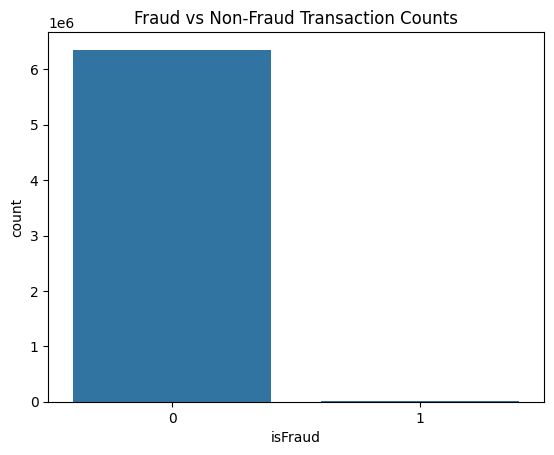

In [4]:
df['isFraud'].value_counts()
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud Transaction Counts")
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Keep only numerical features
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_filtered = df[features + ['isFraud']].copy()

# Step 2: Fill any missing values (if any)
df_filtered.fillna(0, inplace=True)

# Step 3: Normalize features
scaler = MinMaxScaler()
df_filtered[features] = scaler.fit_transform(df_filtered[features])

# Check result
df_filtered.head()
        

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.000106,0.002855,0.003233,0.000000,0.0,0
1,0.000020,0.000357,0.000391,0.000000,0.0,0
2,0.000002,0.000003,0.000000,0.000000,0.0,1
3,0.000002,0.000003,0.000000,0.000059,0.0,1
4,0.000126,0.000697,0.000603,0.000000,0.0,0


In [6]:
import numpy as np

SEQUENCE_LENGTH = 10

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length][features].values
        sequences.append(seq)
    return np.array(sequences)

# Use only non-fraud data for training
normal_data = df_filtered[df_filtered['isFraud'] == 0].reset_index(drop=True)

X_train = create_sequences(normal_data, SEQUENCE_LENGTH)

print("Shape of training sequence data:", X_train.shape)


Shape of training sequence data: (6354397, 10, 5)


In [ ]:
#6.35 million sequences, each of shape (10 time steps × 5 features). This is a solid dataset size for training an LSTM Autoencoder.